In [1]:
from nrclex import NRCLex
import pandas as pd
import re
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

In [2]:
def nrclexFunctionFear(tweet):
    emotion = NRCLex(tweet)
    return emotion.affect_frequencies['fear']

def nrclexFunctionAnger(tweet):
    emotion = NRCLex(tweet)
    return  emotion.affect_frequencies['anger']

def nrclexFunctionAnticip(tweet):
    emotion = NRCLex(tweet)
    return  emotion.affect_frequencies['anticip']

def nrclexFunctionTrust(tweet):
    emotion = NRCLex(tweet)
    return  emotion.affect_frequencies['trust']

def nrclexFunctionSurprise(tweet):
    emotion = NRCLex(tweet)
    return  emotion.affect_frequencies['surprise']

def nrclexFunctionPositive(tweet):
    emotion = NRCLex(tweet)
    return  emotion.affect_frequencies['positive']

def nrclexFunctionNegative(tweet):
    emotion = NRCLex(tweet)
    return  emotion.affect_frequencies['negative']

def nrclexFunctionSadness(tweet):
    emotion = NRCLex(tweet)
    return  emotion.affect_frequencies['sadness']

def nrclexFunctionDisgust(tweet):
    emotion = NRCLex(tweet)
    return  emotion.affect_frequencies['disgust']

def nrclexFunctionJoy(tweet):
    emotion = NRCLex(tweet)
    return  emotion.affect_frequencies['joy']

In [3]:

df = pd.read_csv('trainTwitter.csv')
df.head()

,Id,Tweet,following,followers,actions,is_retweet,location,Type
0,10091,It's the everything else that's complicated. #...,0.0,11500.0,NaN,0.0,Chicago,Quality
1,10172,Eren sent a glare towards Mikasa then nodded a...,0.0,0.0,NaN,0.0,NaN,Quality
2,7012,I posted a new photo to Facebook http://fb.me/...,0.0,0.0,NaN,0.0,"Scotland, U.K",Quality
3,3697,#jan Idiot Chelsea Handler Diagnoses Trump Wit...,3319.0,611.0,294.0,0.0,"Atlanta, Ga",Spam
4,10740,Pedophile Anthony Weiner is TERRIFIED of Getti...,4840.0,1724.0,1522.0,0.0,Blumberg,Spam


In [4]:
# Clean Text
def cleanText(text):
    text = re.sub(r'@[A-Za-z0-9]+','',text)
    text = re.sub(r'#','', text)
    text = re.sub(r'RT[\s]+', '', text)
    text = re.sub(r'https?:\/\/\S+','', text)
    text = text.lower()

    return text

#Tweets Cleaned to Remove Extra Text. ie. retweets, links, etc"
print('/////////////////////////////////////////////////////////////')
df['Tweet'] = df['Tweet'].apply(cleanText)
df.head()

/////////////////////////////////////////////////////////////


,Id,Tweet,following,followers,actions,is_retweet,location,Type
0,10091,it's the everything else that's complicated. p...,0.0,11500.0,NaN,0.0,Chicago,Quality
1,10172,eren sent a glare towards mikasa then nodded a...,0.0,0.0,NaN,0.0,NaN,Quality
2,7012,i posted a new photo to facebook,0.0,0.0,NaN,0.0,"Scotland, U.K",Quality
3,3697,jan idiot chelsea handler diagnoses trump with...,3319.0,611.0,294.0,0.0,"Atlanta, Ga",Spam
4,10740,pedophile anthony weiner is terrified of getti...,4840.0,1724.0,1522.0,0.0,Blumberg,Spam


In [5]:
# Generate Values for Sentiment with NRCLex
# Replace with a more efficient function later
df['fear'] = df['Tweet'].apply(nrclexFunctionFear)
df['anger'] = df['Tweet'].apply(nrclexFunctionAnger)
df['anticip'] = df['Tweet'].apply(nrclexFunctionAnticip)
df['trust'] = df['Tweet'].apply(nrclexFunctionTrust)
df['surprise'] = df['Tweet'].apply(nrclexFunctionSurprise)
df['positive'] = df['Tweet'].apply(nrclexFunctionPositive)
df['negative'] = df['Tweet'].apply(nrclexFunctionNegative)
df['sadness'] = df['Tweet'].apply(nrclexFunctionSadness)
df['disgust'] = df['Tweet'].apply(nrclexFunctionDisgust)
df['joy'] = df['Tweet'].apply(nrclexFunctionJoy)
df.head()

,Id,Tweet,following,followers,actions,is_retweet,location,Type,fear,anger,anticip,trust,surprise,positive,negative,sadness,disgust,joy
0,10091,it's the everything else that's complicated. p...,0.0,11500.0,NaN,0.0,Chicago,Quality,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.00,0.000000
1,10172,eren sent a glare towards mikasa then nodded a...,0.0,0.0,NaN,0.0,NaN,Quality,0.111111,0.111111,0.0,0.111111,0.111111,0.111111,0.111111,0.111111,0.00,0.111111
2,7012,i posted a new photo to facebook,0.0,0.0,NaN,0.0,"Scotland, U.K",Quality,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000
3,3697,jan idiot chelsea handler diagnoses trump with...,3319.0,611.0,294.0,0.0,"Atlanta, Ga",Spam,0.125000,0.125000,0.0,0.000000,0.125000,0.000000,0.250000,0.125000,0.25,0.000000
4,10740,pedophile anthony weiner is terrified of getti...,4840.0,1724.0,1522.0,0.0,Blumberg,Spam,0.250000,0.250000,0.0,0.000000,0.000000,0.000000,0.250000,0.250000,0.00,0.000000


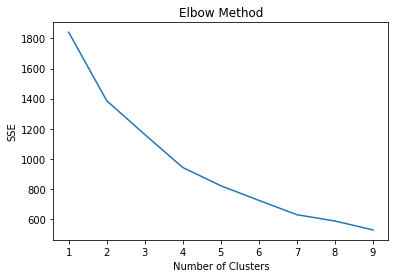

In [11]:
# Find optimal k value for k-means using Elbow Criterion Method
data2 = df[['fear', 'anger', 'anticip', 'trust', 'surprise', 'positive', 'negative', 'sadness', 'disgust', 'joy']]

sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(data2)
    sse[k] = kmeans.inertia_ #Sum of distances to their closest cluster
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()


In [72]:
# Cluster the dataset with KMeans
# Using 7 Clusters according to Elbow Criterion Method
kmeans = KMeans(n_clusters=7)
y = kmeans.fit_predict(df[['fear','anger','anticip', 'trust', 'surprise', 'positive', 'negative', 'sadness', 'disgust', 'joy']])
df['Cluster'] = y
df.sample(5)

,Id,Tweet,following,followers,actions,is_retweet,location,Type,fear,anger,anticip,trust,surprise,positive,negative,sadness,disgust,joy,Cluster
7860,8364,"trudeau demands you respect fgm, jihad/terrori...",1685.0,1312.0,801.0,1.0,United States,Spam,0.111111,0.055556,0.0,0.111111,0.111111,0.166667,0.111111,0.055556,0.055556,0.111111,3
3247,542,[video] pentagon maker [m2 pentagonmaker] kino...,0.0,0.0,12.0,0.0,20160328,Quality,0.000000,0.000000,0.0,0.333333,0.000000,0.333333,0.000000,0.000000,0.000000,0.333333,3
4499,5651,girl you should know that — that??? …,0.0,0.0,0.0,0.0,NaN,Quality,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
7922,2768,enpt latest exclusive pic. .pic.twitter.com/7q...,0.0,15800.0,21.0,0.0,"Chennai, India",Quality,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
5381,4939,"topnews ucla shooter had 'kill list,' left ano...",14178.0,13259.0,34457.0,0.0,Russian Federation,Spam,0.375000,0.125000,0.0,0.125000,0.000000,0.125000,0.125000,0.125000,0.000000,0.000000,2


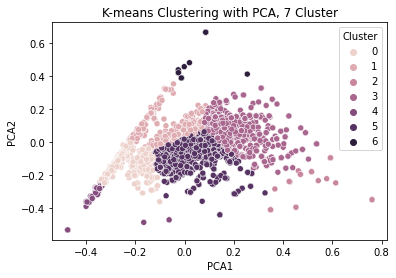

In [8]:
pca_num_components = 2
reduced_data = PCA(n_components = pca_num_components).fit_transform(df[['fear', 'anger', 'anticip', 'trust', 'surprise', 'positive', 'negative', 'sadness', 'disgust', 'joy']])
results = pd.DataFrame(reduced_data, columns = ['PCA1','PCA2'])

y = kmeans.fit_predict(results)
df['Cluster'] = y

sns.scatterplot(x='PCA1', y = 'PCA2',hue=df['Cluster'], data=results)
plt.title('K-means Clustering with PCA, 7 Cluster')
plt.show()

For n cluster = 2, Silhouette Coefficient is 0.31126435888194365
For n cluster = 3, Silhouette Coefficient is 0.30954192715946005
For n cluster = 4, Silhouette Coefficient is 0.38175137799531256
For n cluster = 5, Silhouette Coefficient is 0.40136446368930434
For n cluster = 6, Silhouette Coefficient is 0.4387700287213123
For n cluster = 7, Silhouette Coefficient is 0.45216079120381136
For n cluster = 8, Silhouette Coefficient is 0.4643501237759682
For n cluster = 9, Silhouette Coefficient is 0.4780997519862961
For n cluster = 10, Silhouette Coefficient is 0.49074893905657596
For n cluster = 11, Silhouette Coefficient is 0.49959636976333943
For n cluster = 12, Silhouette Coefficient is 0.5074925803008082
For n cluster = 13, Silhouette Coefficient is 0.5112512818260092
For n cluster = 14, Silhouette Coefficient is 0.5141641688077639
For n cluster = 15, Silhouette Coefficient is 0.516079456533538
For n cluster = 16, Silhouette Coefficient is 0.525595325916611
For n cluster = 17, Silhouet

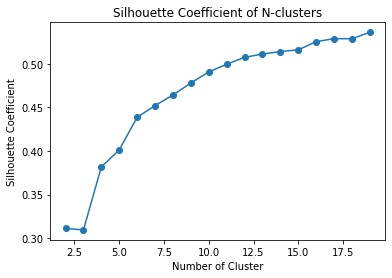

In [9]:
silhouettex = []
silhouettey = []
plt.clf()
for n_cluster in range(2,20):
    kmeans = KMeans(n_clusters=n_cluster).fit(df[['fear','anger','anticip', 'trust', 'surprise', 'positive', 'negative', 'sadness', 'disgust', 'joy']])
    label = kmeans.labels_
    sil_coeff = silhouette_score(df[['fear','anger','anticip', 'trust', 'surprise', 'positive', 'negative', 'sadness', 'disgust', 'joy']], label, metric='euclidean')
#     plt.scatter(n_cluster, sil_coeff)
#     plt.plot(n_cluster,sil_coeff)
    silhouettex.append(n_cluster)
    silhouettey.append(sil_coeff)
    print("For n cluster = {}, Silhouette Coefficient is {}".format(n_cluster, sil_coeff))
    
plt.plot(silhouettex, silhouettey, marker = "o")
plt.title("Silhouette Coefficient of N-clusters")
plt.xlabel("Number of Cluster")
plt.ylabel("Silhouette Coefficient")
plt.show()
    

In [28]:
df.sample()
        

,Id,Tweet,following,followers,actions,is_retweet,location,Type,fear,anger,anticip,trust,surprise,positive,negative,sadness,disgust,joy,Cluster
259,1972,congrats to all the hard working writers who a...,0.0,0.0,3.0,0.0,"Los Angeles, CA",Quality,0.0,0.0,0.0,0.0,0.0,0.5,0.25,0.0,0.0,0.0,5


In [62]:
for n_cluster in range(0,7):
    cluster_ = df[df["Cluster"] == n_cluster]
    print("Cluster: {}".format(n_cluster))
    print("Total Tweets: {}".format(len(cluster_.index)))
    print("Number of Quality Tweets: {}".format(len(cluster_[cluster_["Type"] == "Quality"])))
    print("Number of Spam Tweets: {}".format(len(cluster_[cluster_["Type"] == "Spam"])))
    print("Percentage of Spam/Total: {}".format(len(cluster_[cluster_["Type"] == "Spam"])/len(cluster_.index)))
    print("////////////////////////////////////")

Cluster: 0
Total Tweets: 1400
Number of Quality Tweets: 464
Number of Spam Tweets: 936
Percentage of Spam/Total: 0.6685714285714286
////////////////////////////////////
Cluster: 1
Total Tweets: 3336
Number of Quality Tweets: 1946
Number of Spam Tweets: 1390
Percentage of Spam/Total: 0.4166666666666667
////////////////////////////////////
Cluster: 2
Total Tweets: 491
Number of Quality Tweets: 272
Number of Spam Tweets: 219
Percentage of Spam/Total: 0.4460285132382892
////////////////////////////////////
Cluster: 3
Total Tweets: 1892
Number of Quality Tweets: 1097
Number of Spam Tweets: 795
Percentage of Spam/Total: 0.4201902748414376
////////////////////////////////////
Cluster: 4
Total Tweets: 442
Number of Quality Tweets: 217
Number of Spam Tweets: 225
Percentage of Spam/Total: 0.5090497737556561
////////////////////////////////////
Cluster: 5
Total Tweets: 1163
Number of Quality Tweets: 472
Number of Spam Tweets: 691
Percentage of Spam/Total: 0.5941530524505589
//////////////////////

In [89]:
print("Spam Clusters: 0, 4, 5, 6")
print("Quality Clusters: 1, 2, 3")
# kmeans.cluster_centers_

Spam Clusters: 0, 4, 5, 6
Quality Clusters: 1, 2, 3


In [80]:
dfTest = pd.read_csv('testTwitter.csv')
# Clean Text
def cleanText(text):
    text = re.sub(r'@[A-Za-z0-9]+','',text)
    text = re.sub(r'#','', text)
    text = re.sub(r'RT[\s]+', '', text)
    text = re.sub(r'https?:\/\/\S+','', text)
    text = text.lower()

    return text

# Generate Values for Sentiment with NRCLex
# Replace with a more efficient function later
dfTest['fear'] = dfTest['Tweet'].apply(nrclexFunctionFear)
dfTest['anger'] = dfTest['Tweet'].apply(nrclexFunctionAnger)
dfTest['anticip'] = dfTest['Tweet'].apply(nrclexFunctionAnticip)
dfTest['trust'] = dfTest['Tweet'].apply(nrclexFunctionTrust)
dfTest['surprise'] = dfTest['Tweet'].apply(nrclexFunctionSurprise)
dfTest['positive'] = dfTest['Tweet'].apply(nrclexFunctionPositive)
dfTest['negative'] = dfTest['Tweet'].apply(nrclexFunctionNegative)
dfTest['sadness'] = dfTest['Tweet'].apply(nrclexFunctionSadness)
dfTest['disgust'] = dfTest['Tweet'].apply(nrclexFunctionDisgust)
dfTest['joy'] = dfTest['Tweet'].apply(nrclexFunctionJoy)
dfTest.head()

#Tweets Cleaned to Remove Extra Text. ie. retweets, links, etc"
print('/////////////////////////////////////////////////////////////')
dfTest['Tweet'] = dfTest['Tweet'].apply(cleanText)

dfTest.head()


/////////////////////////////////////////////////////////////


,Id,Tweet,following,followers,actions,is_retweet,location,Type,fear,anger,anticip,trust,surprise,positive,negative,sadness,disgust,joy
0,7531,aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa...,13467.0,54078.0,17910.0,1,United States,Spam,0.00,0.000,0.0,0.000,0.000,0.0,0.00,0.000,0.0,0.0
1,281,"two more to come from : kukushkin v bellucci, ...",0.0,253000.0,7.0,0,"2000 matches, 63 ATP tournaments, live & replays",Quality,0.00,0.000,0.0,0.000,0.000,0.0,0.00,0.000,0.0,0.0
2,3144,all lies perpetuated to invade america & barry...,1607.0,1577.0,991.0,1,United States,Spam,0.25,0.125,0.0,0.125,0.125,0.0,0.25,0.125,0.0,0.0
3,9078,today is the day,58000.0,6920000.0,NaN,0,LA,Quality,0.00,0.000,0.0,0.000,0.000,0.0,0.00,0.000,0.0,0.0
4,7189,where are you sitting for the miami show?,0.0,0.0,NaN,0,"Miami, FL",Quality,0.00,0.000,0.0,1.000,0.000,0.0,0.00,0.000,0.0,0.0


In [83]:
prediction = kmeans.predict(dfTest[['fear','anger','anticip', 'trust', 'surprise', 'positive', 'negative', 'sadness', 'disgust', 'joy']])

In [88]:
dfTest['Cluster'] = prediction
testResult = dfTest[['Tweet', 'Type', 'Cluster']]
testResult.head()

,Tweet,Type,Cluster
0,aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa...,Spam,1
1,"two more to come from : kukushkin v bellucci, ...",Quality,1
2,all lies perpetuated to invade america & barry...,Spam,2
3,today is the day,Quality,1
4,where are you sitting for the miami show?,Quality,4


In [93]:
print("Spam Clusters: 0, 5")
print("Quality Clusters: 1, 2, 3, 4, 6")
print("////////////////////////////////////")

for n_cluster in range(0,7):
    cluster_ = dfTest[dfTest["Cluster"] == n_cluster]
    print("Cluster: {}".format(n_cluster))
    print("Total Tweets: {}".format(len(cluster_.index)))
    print("Number of Quality Tweets: {}".format(len(cluster_[cluster_["Type"] == "Quality"])))
    print("Number of Spam Tweets: {}".format(len(cluster_[cluster_["Type"] == "Spam"])))
    print("Percentage of Spam/Total: {}".format(len(cluster_[cluster_["Type"] == "Spam"])/len(cluster_.index)))
    print("////////////////////////////////////")

Spam Clusters: 0, 5
Quality Clusters: 1, 2, 3, 4, 6
////////////////////////////////////
Cluster: 0
Total Tweets: 161
Number of Quality Tweets: 84
Number of Spam Tweets: 77
Percentage of Spam/Total: 0.4782608695652174
////////////////////////////////////
Cluster: 1
Total Tweets: 1469
Number of Quality Tweets: 774
Number of Spam Tweets: 695
Percentage of Spam/Total: 0.47311095983662355
////////////////////////////////////
Cluster: 2
Total Tweets: 603
Number of Quality Tweets: 232
Number of Spam Tweets: 371
Percentage of Spam/Total: 0.615257048092869
////////////////////////////////////
Cluster: 3
Total Tweets: 649
Number of Quality Tweets: 413
Number of Spam Tweets: 236
Percentage of Spam/Total: 0.36363636363636365
////////////////////////////////////
Cluster: 4
Total Tweets: 69
Number of Quality Tweets: 33
Number of Spam Tweets: 36
Percentage of Spam/Total: 0.5217391304347826
////////////////////////////////////
Cluster: 5
Total Tweets: 61
Number of Quality Tweets: 34
Number of Spam Tw